**ЗАВАНТАЖЕННЯ ДАНИХ**
-
Необхідним для аналізу є тільки _один_ файл "ratings.csv" зі стовпцями "userId", "movieId", "rating", "timestamp", які однозначно відповідають послідовності очікуваних стовпців в модулі "surprise", що задаються аргументом "line_format". Інші файли ("links.csv", "movies,csv", "tags.csv") використовуються для комунікації з користувачем і для аналізу та навчання є зайвими.

_Я використав small-версію завантаженого дейтасету, оскільки повна версія потребує значно більших ресурсів, ніж є на моєму ноутбуці._

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from surprise import BaselineOnly, Dataset, Reader, SVD, SVDpp, NMF
from surprise.model_selection import cross_validate
import time

In [2]:
reader = Reader(
    line_format="user item rating timestamp",
    sep=",",       # значення у csv-файлі розділені комою
    skip_lines=1)  # пропустити перший рядок з назвами колонок
# data = Dataset.load_from_file(Path("ml-25m") / "ratings.csv", reader=reader) # my PC hangs on this file
data = Dataset.load_from_file(Path("ml-latest-small") / "ratings.csv", reader=reader)

**КРОС-ВАЛІДАЦІЯ МОДЕЛЕЙ, СТВОРЮВАНИХ ЗА АЛГОРИТМАМИ SVD, SVD++, NMF**
-
_Також звертаємо увагу на час роботи і оцінки тестування_

In [3]:
ttvSVD = time.time() # time to validate
mapSVD = cross_validate(SVD(), data, cv=5, return_train_measures=True, n_jobs=-1, verbose=True)
ttvSVD = time.time() - ttvSVD
print(f"[*] Elapsed time: {ttvSVD/60} min")
mapSVD

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8730  0.8747  0.8744  0.8757  0.8658  0.8727  0.0036  
MAE (testset)     0.6703  0.6698  0.6724  0.6730  0.6660  0.6703  0.0025  
RMSE (trainset)   0.6327  0.6331  0.6347  0.6352  0.6376  0.6347  0.0017  
MAE (trainset)    0.4911  0.4916  0.4925  0.4934  0.4955  0.4928  0.0016  
Fit time          1.08    1.14    1.12    1.15    1.21    1.14    0.04    
Test time         0.15    0.15    0.15    0.15    0.15    0.15    0.00    
[*] Elapsed time: 0.11047292550404866 min


{'test_rmse': array([0.87295432, 0.87465001, 0.87441542, 0.87570169, 0.86575882]),
 'train_rmse': array([0.6327324 , 0.63307246, 0.63470844, 0.63520167, 0.63757807]),
 'test_mae': array([0.67028464, 0.66977749, 0.67242415, 0.67296825, 0.66599188]),
 'train_mae': array([0.49111131, 0.49155963, 0.49246168, 0.49336049, 0.49553989]),
 'fit_time': (1.080263376235962,
  1.1390931606292725,
  1.1219604015350342,
  1.1519854068756104,
  1.2112045288085938),
 'test_time': (0.15336084365844727,
  0.14654016494750977,
  0.1497359275817871,
  0.14586734771728516,
  0.14980363845825195)}

In [4]:
ttvSVDpp = time.time()
mapSVDpp = cross_validate(SVDpp(), data, cv=5, return_train_measures=True, n_jobs=-1, verbose=True)
ttvSVDpp = time.time() - ttvSVDpp
print(f"[*] Elapsed time: {ttvSVDpp/60} min")
mapSVDpp

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8562  0.8696  0.8642  0.8667  0.8568  0.8627  0.0053  
MAE (testset)     0.6573  0.6650  0.6606  0.6641  0.6593  0.6612  0.0029  
RMSE (trainset)   0.6750  0.6716  0.6729  0.6660  0.6674  0.6706  0.0034  
MAE (trainset)    0.5206  0.5175  0.5188  0.5129  0.5138  0.5167  0.0029  
Fit time          173.84  271.97  171.83  173.94  143.33  186.98  44.05   
Test time         11.62   11.56   12.63   11.55   7.20    10.91   1.90    
[*] Elapsed time: 6.9806829452514645 min


{'test_rmse': array([0.85619875, 0.86956539, 0.86421808, 0.86670077, 0.85681332]),
 'train_rmse': array([0.67498119, 0.6715759 , 0.67289361, 0.66595897, 0.66744191]),
 'test_mae': array([0.65725554, 0.66501279, 0.66062006, 0.66409429, 0.65925956]),
 'train_mae': array([0.5205641 , 0.51750823, 0.51876116, 0.51287262, 0.51384814]),
 'fit_time': (173.84454250335693,
  271.966432094574,
  171.8289749622345,
  173.93716049194336,
  143.3295121192932),
 'test_time': (11.616873741149902,
  11.562052726745605,
  12.626037120819092,
  11.546443700790405,
  7.1980204582214355)}

In [5]:
ttvNMF = time.time()
mapNMF = cross_validate(NMF(), data, cv=5, return_train_measures=True, n_jobs=-1, verbose=True)
ttvNMF = time.time() - ttvNMF
print(f"[*] Elapsed time: {ttvNMF/60} min")
mapNMF

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9227  0.9206  0.9196  0.9211  0.9241  0.9216  0.0016  
MAE (testset)     0.7053  0.7088  0.7059  0.7061  0.7067  0.7065  0.0012  
RMSE (trainset)   0.6092  0.6061  0.6083  0.6060  0.6055  0.6070  0.0014  
MAE (trainset)    0.4406  0.4394  0.4408  0.4382  0.4383  0.4395  0.0011  
Fit time          4.52    1.81    1.86    1.77    2.11    2.41    1.06    
Test time         0.15    0.17    0.13    0.15    0.16    0.15    0.01    
[*] Elapsed time: 0.11871934731801351 min


{'test_rmse': array([0.92269283, 0.92064019, 0.91957129, 0.9211147 , 0.92408409]),
 'train_rmse': array([0.60916744, 0.60607257, 0.60825601, 0.60603129, 0.6054646 ]),
 'test_mae': array([0.70528965, 0.70876157, 0.70588995, 0.70612155, 0.7066779 ]),
 'train_mae': array([0.4405616 , 0.43935959, 0.4408167 , 0.43820685, 0.4383146 ]),
 'fit_time': (4.520697593688965,
  1.8104627132415771,
  1.85603666305542,
  1.7724127769470215,
  2.108020782470703),
 'test_time': (0.15372157096862793,
  0.1657876968383789,
  0.13308024406433105,
  0.14845943450927734,
  0.16399312019348145)}

**АНАЛІЗ РЕЗУЛЬТАТІВ**
-

In [6]:
print(f"SVD   test/train: RMSE mean: {'{:.3f}'.format(mapSVD['test_rmse'].mean())}/{'{:.3f}'.format(mapSVD['train_rmse'].mean())}, "
      f"MAE mean: {'{:.3f}'.format(mapSVD['test_mae'].mean())}/{'{:.3f}'.format(mapSVD['train_mae'].mean())}, "
      f"learn/test time: {ttvSVD}/{np.array(mapSVD['test_time']).mean()}")
print(f"SVD++ test/train: RMSE mean: {'{:.3f}'.format(mapSVDpp['test_rmse'].mean())}/{'{:.3f}'.format(mapSVDpp['train_rmse'].mean())}, "
      f"MAE mean: {'{:.3f}'.format(mapSVDpp['test_mae'].mean())}/{'{:.3f}'.format(mapSVDpp['train_mae'].mean())}, "
      f"learn/test time: {ttvSVDpp}/{np.array(mapSVDpp['test_time']).mean()}")
print(f"NMF   test/train: RMSE mean: {'{:.3f}'.format(mapNMF['test_rmse'].mean())}/{'{:.3f}'.format(mapNMF['train_rmse'].mean())}, "
      f"MAE mean: {'{:.3f}'.format(mapNMF['test_mae'].mean())}/{'{:.3f}'.format(mapNMF['train_mae'].mean())}, "
      f"learn/test time: {ttvNMF}/{np.array(mapNMF['test_time']).mean()}")

SVD   test/train: RMSE mean: 0.873/0.635, MAE mean: 0.670/0.493, learn/test time: 6.62837553024292/0.14906158447265624
SVD++ test/train: RMSE mean: 0.863/0.671, MAE mean: 0.661/0.517, learn/test time: 418.8409767150879/10.909885549545288
NMF   test/train: RMSE mean: 0.922/0.607, MAE mean: 0.707/0.439, learn/test time: 7.1231608390808105/0.15300841331481935


**ВИСНОВОК**
-
1. Найкращий алгоритм той, який найменше помиляється, тобто значення **RMSE** та **MAE** найменші.
2. **SVD++** має найменьші показники **RMSE/MAE**. Але і для **SVD** ці ж показники не на багато гірші (не більше ніж на 2%).
4. **SVD++** в _100_(!) разів довше працює.
5. Враховуючи пп. 1-3 я би вибрав алгоритм **SVD++** радше за **SVD** за умови відсутності часових обмежень (інтенсивності потоку рекомендаційних запитів) на прийняття рішення та відсутності необхідності частого повторного навчання, яке намагається поглинути весь обчислювальний ресурс хоста. Алгоритм **NMF** для даного датасету є найгіршим.

**ЗАВДАННЯ ЗІ "🌠"**
-
Реалізувати алгоритм колабораційної фільтрації з нуля на основі MATLAB файла "movies.mat" (та "movie_ids.txt"). 

In [7]:
from scipy.io import loadmat # will be used to load MATLAB mat datafile format
import matplotlib.pyplot as plt

In [8]:
def loadMovieList():
    """
    Reads the fixed movie list in movie_ids.txt and returns a list of movie names.
    Returns
    -------
    movieNames : list
        A list of strings, representing all movie names.
    """
    # Read the fixed movieulary list
    with open('movie_ids.txt',  encoding='ISO-8859-1') as fid:
        movies = fid.readlines()

    movieNames = []
    for movie in movies:
        parts = movie.split()
        movieNames.append(' '.join(parts[1:]).strip())
    return movieNames

In [9]:
movie_names = loadMovieList()
movie_names[0:5]

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)']

Average rating for movie #82 (Jurassic Park (1993)): 2.603393


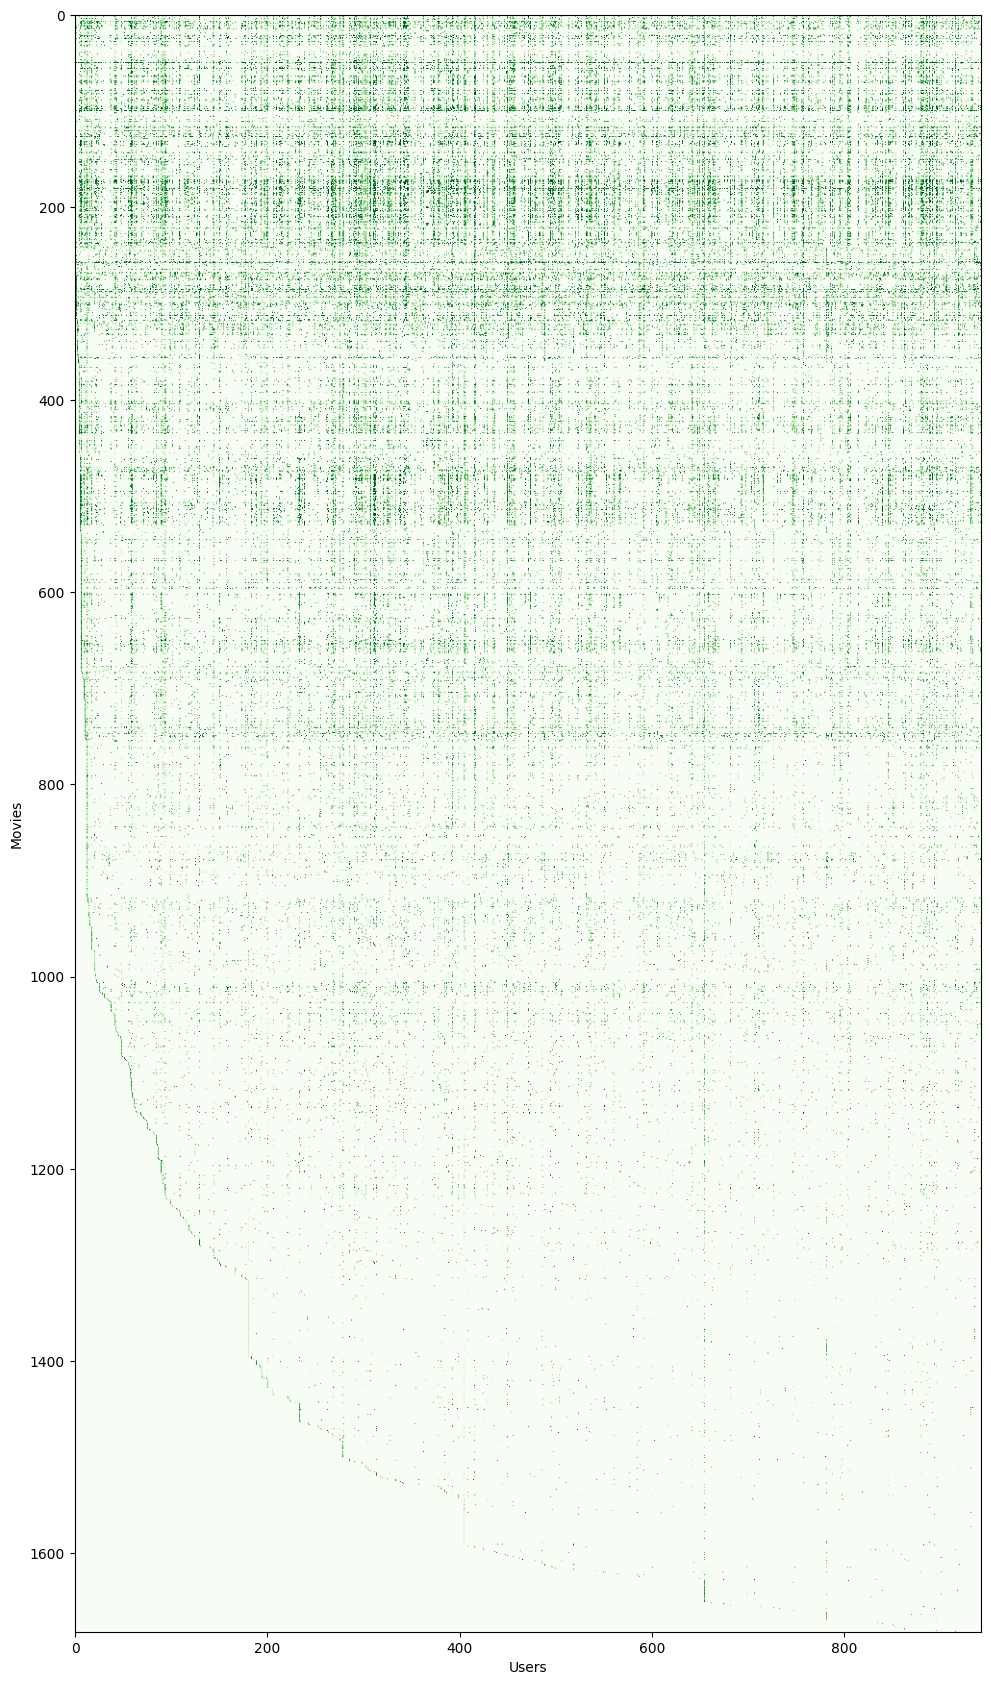

In [10]:
# Load data
data = loadmat('movies.mat')
Y, R = data['Y'], data['R']

# Y is a 1682x943 matrix, containing ratings (1-5) of 
# 1682 movies on 943 users

# R is a 1682x943 matrix, where R(i,j) = 1 
# if and only if user j gave a rating to movie i

# From the matrix, we can compute statistics like average rating.
movie_id = 82
print("Average rating for movie #{:d} ({:s}): {:f}".format(movie_id, movie_names[movie_id-1], np.mean(Y[movie_id-1,R[0,:]])))

# We can "visualize" the ratings matrix by plotting it with imshow
plt.figure(figsize=(21, 21))
plt.imshow(Y, cmap='Greens')
plt.ylabel('Movies')
plt.xlabel('Users')
plt.grid(False)

In [11]:
Y.shape

(1682, 943)

In [12]:
np.count_nonzero(R)

100000

In [13]:
R.max()

1

**ОБЧИСЛЕННЯ ПОДІБНОСТІ**
-
Квадратна матриця подібності за коефіціентом Пірсона є симетричною відносно одиничної головної діагоналі. 

In [14]:
def simty_pearson(Y, R):
    """
    Count user similarity matrix by using pearson correlation.
    Matrix is symmetrical. So there are calculating only triangular
    part of matrix (half matrix).
    """
    user_amount = Y.shape[1]
    user_simty = np.eye(user_amount, dtype=float)
    for i in range(user_amount-1):
        for j in range(i+1,user_amount):
            m = R[:,i] & R[:,j]
            if np.count_nonzero(m) > 1: # must be more than 1 common rated movie!
                # Avoid std() exactly = 0 (i.e., all values are the same number)
                # to be able to calc corrcoef 
                Yi = Y[m>0,i].astype(float); Yi[0] += 1e-15
                Yj = Y[m>0,j].astype(float); Yj[0] += 1e-15
                user_simty[i,j] = np.corrcoef(Yi, Yj)[0,1]
                user_simty[j,i] = user_simty[i,j]
    return user_simty

ttv_simty = time.time()
user_simty = simty_pearson(Y, R)
ttv_simty = time.time() - ttv_simty
print(f"[*] Elapsed time: {ttv_simty/60} min")

assert np.count_nonzero(np.isnan(user_simty)) == 0, "Wrong corrcoef value(s) detected!"
user_simty

[*] Elapsed time: 0.736198365688324 min


array([[ 1.        ,  0.16084123,  0.11278048, ...,  0.20561572,
        -0.18078375,  0.06754943],
       [ 0.16084123,  1.        ,  0.06741999, ..., -0.06201737,
         0.08596024,  0.47970161],
       [ 0.11278048,  0.06741999,  1.        , ...,  1.        ,
        -0.01179167,  0.70710678],
       ...,
       [ 0.20561572, -0.06201737,  1.        , ...,  1.        ,
        -0.57735027, -0.39528471],
       [-0.18078375,  0.08596024, -0.01179167, ..., -0.57735027,
         1.        ,  0.27743263],
       [ 0.06754943,  0.47970161,  0.70710678, ..., -0.39528471,
         0.27743263,  1.        ]])

**ПЕРЕДБАЧЕННЯ ВІДСУТНІХ ВПОДОБАНЬ КОРИСТУВАЧІВ**
-

In [15]:
def predict_absent_ratings(Y, R, user_similarity=None):
    """
    Predict absent movie ratings.
    """
    if user_similarity is None:
        user_similarity = simty_pearson(Y, R)
    movie_amount, user_amount = Y.shape
    ratings = np.zeros((movie_amount, user_amount))
    for i in range(movie_amount):
        for j in range(user_amount):
            if R[i,j] != 0: continue # rating already exists - skip
            who_rated_movie = np.nonzero(R[i,:])[0] # who had already rated movie i
            if len(who_rated_movie) == 0: continue
            # Calc prediction
            simty_coefs = user_similarity[j,who_rated_movie]
            simty_ratings = Y[i,who_rated_movie]
            rts = np.sum(np.abs(simty_coefs))
            if np.allclose([rts], [0.]): continue # ignoring unsimilar users
            ratings[i,j] = (simty_coefs @ simty_ratings) / rts
    return ratings

ttv_predict = time.time()
ratings = predict_absent_ratings(Y, R, user_similarity=user_simty)
ttv_predict = time.time() - ttv_predict
print(f"[*] Elapsed time: {ttv_predict/60} min")

ratings

[*] Elapsed time: 2.0398480733235678 min


array([[ 0.        ,  0.        ,  1.40974356, ...,  0.        ,
         2.1776419 ,  2.68618372],
       [ 0.        ,  2.60348921,  1.82050062, ...,  1.89959848,
         1.91172694,  0.        ],
       [ 0.        ,  2.45652317,  1.38296406, ...,  1.6648952 ,
         1.7712596 ,  2.56986261],
       ...,
       [ 2.        , -2.        , -2.        , ...,  2.        ,
         2.        ,  0.        ],
       [ 3.        ,  3.        ,  3.        , ...,  3.        ,
         3.        ,  3.        ],
       [ 3.        ,  3.        ,  0.        , ...,  3.        ,
         3.        ,  3.        ]])

**ФОРМУВАННЯ РЕКОМЕНДАЦІЙ**
-

In [16]:
def predict_recommendations(movie_names, user_id, ratings, min_rating=4):
    user_ratings = ratings[user_id - 1]
    user_best_rating_inds = np.argsort(user_ratings)[::-1] # mostly rated indices are firts
    # Selects only the greater than min_rating indices
    user_best_rating_inds = user_best_rating_inds[user_ratings[user_best_rating_inds] >= min_rating]
    recommendations = [(id+1, movie_names[id], user_ratings[id]) for id in user_best_rating_inds]
    return recommendations

user_id = 500
recommendations = predict_recommendations(movie_names, user_id, ratings, min_rating=3.98)
if len(recommendations) == 0:
    print("Nothing else can be recommended. Escuse.")
else:
    i = 0
    for id, movie_name, movie_predicted_rating in recommendations:
        i += 1
        print("{:d}. The {:d}-th movie '{:s}' you would be rated near {:.2f}".format(i, id, movie_name, movie_predicted_rating))

1. The 82-th movie 'Jurassic Park (1993)' you would be rated near 4.06
2. The 125-th movie 'Phenomenon (1996)' you would be rated near 4.02
3. The 392-th movie 'Man Without a Face, The (1993)' you would be rated near 3.99
4. The 889-th movie 'Bent (1997)' you would be rated near 3.98
5. The 487-th movie 'Roman Holiday (1953)' you would be rated near 3.98


**Відкриті питання**
1. Що робити, якщо користувачі поставили мало вподобань (наприклад, на початку старту системи рейтигування)? При малій кількості вподобань дасть ало кореляцій, а в результаті рекомендації надати буде неможливо, а це, в свою чергу, створить враження, що рекомендаційна система не працює взагалі і користувачі не схочуть ставити вподобання.
2. Чому б крім рекомендацій не надавати й список **не**рекомендованих фільмів?
3. Якщо з'явиться новий фільм, то він ніколи не потрапить в рекомендації допоки хтось, всупереч рекомендаціям системи, не вподобає його. Можливо, потрібно крім подібності користувачів обраховувати також і подібність фільмів і включати їх до рекомендацій?
4. Рекомендації можуть бути фіктивнимим від авторів та прихильників. Як з цим боротися?
5. Подібність користувачів по вподобанням дуже схожа на кластеризацію. Чи є користь провести кластеризацію користувачів і шукати вподобання за кластером?